### Machine Learning
    Theory Assessment 
    
    Identifying Spam

### Name and RegNo

In [1]:
print("R.Sri HariHaran 19MID0024")

R.Sri HariHaran 19MID0024


### importing libraries

In [169]:
import numpy as np
import pandas as pd

import string

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [170]:
df=pd.read_csv("emails.csv")

### Data Analysis

In [171]:
df["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [172]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [173]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [174]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [176]:
df.columns

Index(['text', 'spam'], dtype='object')

In [177]:
df['spam'].unique() #1 spam email 0 ham email

array([1, 0], dtype=int64)

In [178]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [179]:
df.shape

(5728, 2)

In [180]:
df.drop_duplicates(inplace=True)

In [181]:
df.shape #we removed duplicates so rows gets reduced

(5695, 2)

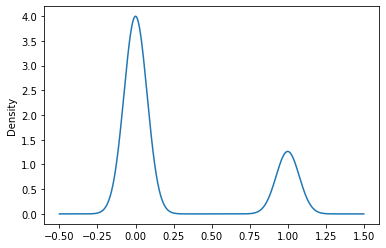

In [182]:
df["spam"].plot.kde()

## Splitting Dataset

In [255]:
X=df['text']
y=df['spam']

In [256]:
X.shape

(5695,)

In [257]:
y.shape

(5695,)

### Model Naive_Bayes(NB)

In [258]:
from sklearn.naive_bayes import MultinomialNB

In [259]:
cv=CountVectorizer()

In [260]:
X=cv.fit_transform(X)
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [230]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3986, 37303)
X_test :  (1709, 37303)
y_train :  (3986,)
y_test :  (1709,)


In [231]:
X.shape #X is matrix containing repetation of words.

(5695, 37303)

In [232]:
classifier=MultinomialNB()

In [233]:
classifier.fit(X_train,y_train)

MultinomialNB()

### Predictions

In [234]:
predict=classifier.predict(X_test)  #we are predictig the subject(text)
print(predict)

[1 1 0 ... 0 0 0]


In [235]:
print(classifier.predict(X_train))

[0 0 0 ... 0 1 0]


In [236]:
print(y_train.values)

[0 0 0 ... 0 1 0]


In [237]:
print(y_test.values)

[1 1 0 ... 0 0 0]


In [238]:
print(type(X_train))

<class 'scipy.sparse.csr.csr_matrix'>


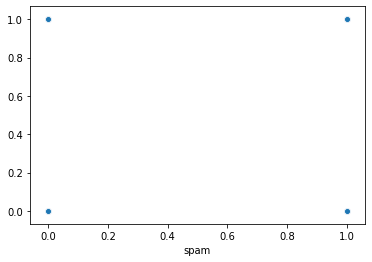

In [239]:
sns.scatterplot(x=y_test,y=y_pred)

### Accuracy , metrics

In [240]:
print("The accuracy of Naive Bayes Model : ",round((metrics.accuracy_score(y_test,predict)*100),4))

The accuracy of Naive Bayes Model :  98.4201


In [241]:
#We got 99% accuracy.
print(metrics.classification_report(y_test,predict)) 
print("\n")

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1293
           1       0.95      0.99      0.97       416

    accuracy                           0.98      1709
   macro avg       0.97      0.99      0.98      1709
weighted avg       0.98      0.98      0.98      1709





Using Naive Bayes Algorithm we have got the precision and recall very close to 1.

### Model Decision Tree

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [244]:
tree=DecisionTreeClassifier()

In [245]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [246]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (3986, 37303)
X_test :  (1709, 37303)
y_train :  (3986,)
y_test :  (1709,)


### Predictions

In [247]:
y_pred=tree.predict(X_test)  #we are predictig the subject(text)

In [248]:
print(y_pred)

[0 1 0 ... 1 0 0]


In [249]:
print(y_test.values)

[0 1 0 ... 1 0 0]


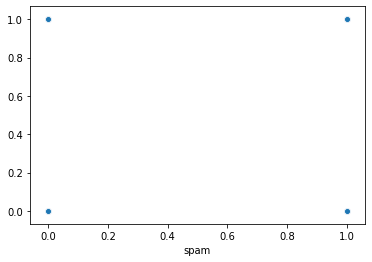

In [250]:
sns.scatterplot(x=y_test,y=y_pred)

### Accuracy , Evaluation Metrics

In [251]:
print("The accuracy of Decision Model : ",round((metrics.accuracy_score(y_test,y_pred)*100),4))

The accuracy of Decision Model :  96.1381


In [252]:
#We got 99% accuracy.
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1318
           1       0.25      0.28      0.26       391

    accuracy                           0.64      1709
   macro avg       0.51      0.51      0.51      1709
weighted avg       0.66      0.64      0.65      1709



### Predicting From User

In [217]:
for i in range(2):
    msg=input("Enter Sentence : ")
    word=[msg]
    vect=cv.transform(word).toarray()
    result=classifier.predict(vect)
    if result==0:
        print("Ham")
    else:
        print("Spam")

Enter Sentence : Have Nice Day and Work 
Ham
Enter Sentence : Billion Dollar Million Money lottery ticket sale
Spam


### Conclusion

In Spam Detection problem we have used two algorithms namely naive-bayes classifier, decision tree classifier.
In both algorithms, we allocated 80% training data and 20% testing data. 
In Naive_bayes algorithm we got 99% accuracy whereas in decision tree classifier we got 95%.

So it is better to use Naive_Bayes Classifier.

Naive_Bayes(NB) is highly scalable.NB is very useful for binary as well as Multiclass classification